Project title : Retail sales prediction  
Name : Kartik

## Problem Description 
In seven European nations, Rossmann runs more than 3,000 pharmacies. Rossmann shop managers are currently required to forecast their daily sales up to six weeks in advance. Numerous factors, including as marketing, rivalry, state and federal holidays, seasonality, and location, affect store sales. The accuracy of the findings can be highly variable because thousands of different managers are making sales predictions based on their own situations.

You are given information on past sales for 1,115 Rossmann locations. Forecasting the "Sales" column for the test set is the task at hand. Be aware that several of the dataset's stores were temporarily closed during renovations.

## Data Description 
Rossmann Stores Data.csv - historical data including Sales  
store.csv - supplemental information about the stores  


## Data fields
Most of the fields have clear instructions. The descriptions that follow are for those who aren't.  


*   Id - an Id that represents a (Store, Date) duple within the test set
*   Store - a unique Id for each store
*   Sales - the turnover for any given day (this is what you are predicting)


*   Customers - the number of customers on a given day

*   Open - an indicator for whether the store was open: 0 = closed, 1 = open

*   StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
*   SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools


*   StoreType - differentiates between 4 different store models: a, b, c, d


*   Assortment - describes an assortment level: a = basic, b = extra, c = extended

*   CompetitionDistance - distance in meters to the nearest competitor store
*   CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

*  Promo - indicates whether a store is running a promo on that day 
*   Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

*   Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
*   PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store













# *Importing Libraries & Data*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading Rossman Dataset
rossman_df= pd.read_csv('/content/drive/MyDrive/capston project 2/Rossmann Stores Data.csv', low_memory=False)

In [ ]:
#Loading Store Dataset
store_df=pd.read_csv('/content/drive/MyDrive/capston project 2/store.csv')

[link text](https:// [link text](https://))# Analysing the Rossman Dataset

In [ ]:
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
rossman_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


##Checking Information about Dataset

In [ ]:
rossman_df.shape

(1017209, 9)

In [ ]:
#Checking info of data as data types and rows and cols
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
#Checking Null Values
rossman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

## **Summary Statastics Of Dataset**

In [ ]:
#Summary Statastics
rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
#No. Of Stores in the Dataset
rossman_df.Store.nunique()

1115

In [ ]:
# Value_counts of StateHoliday Column
rossman_df.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
print(rossman_df['Date'].min(),'initial')
print(rossman_df['Date'].max(),'final')

2013-01-01 initial
2015-07-31 final


In [ ]:
# extract year, month, day and week of year from "Date"

rossman_df['Date']=pd.to_datetime(rossman_df['Date'])
rossman_df['Year'] = rossman_df['Date'].apply(lambda x: x.year)
rossman_df['Month'] = rossman_df['Date'].apply(lambda x: x.month)
rossman_df['Day'] = rossman_df['Date'].apply(lambda x: x.day)
rossman_df['WeekOfYear'] = rossman_df['Date'].apply(lambda x: x.weekofyear)


In [ ]:
rossman_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
rossman_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31


## **EDA on Rossmman Data set**

<ipython-input-16-b35b1e5c35a2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_map = rossman_df[rossman_df.columns].corr()


<Axes: >

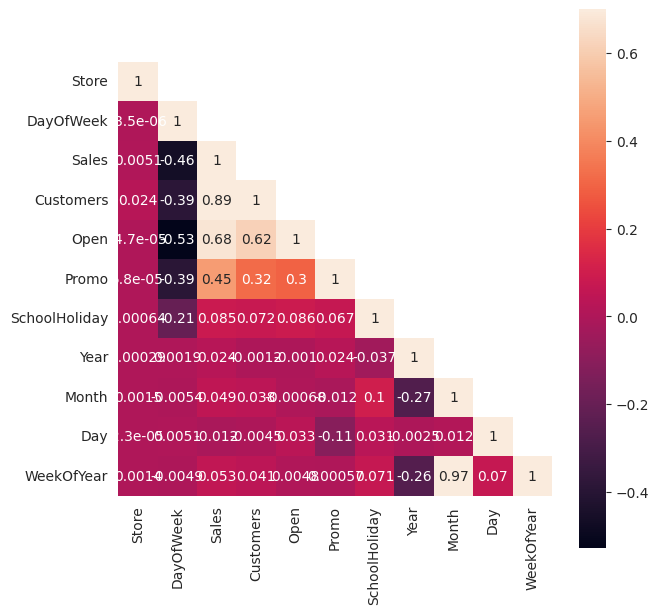

In [ ]:
# correlation between dataset
correlation_map = rossman_df[rossman_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(7,7)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

<Axes: xlabel='DayOfWeek', ylabel='count'>

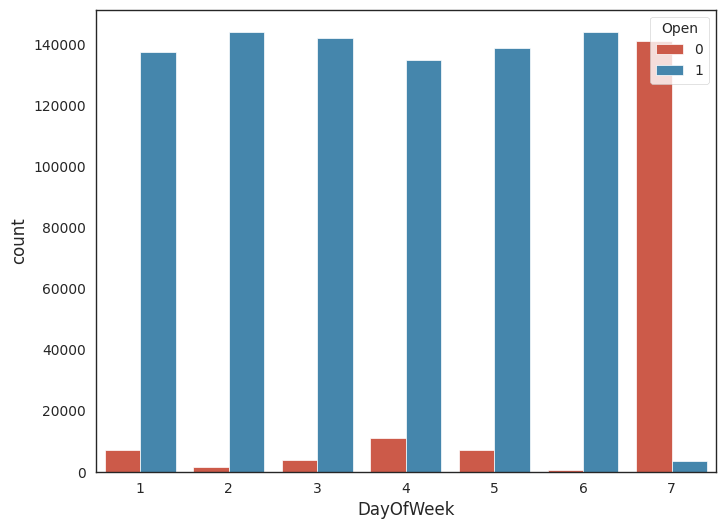

In [ ]:
#As we can see that in the graph given below that Stores mainly closed on Sunday
sns.countplot(x='DayOfWeek',hue='Open',data=rossman_df)

<Axes: xlabel='Promo', ylabel='Sales'>

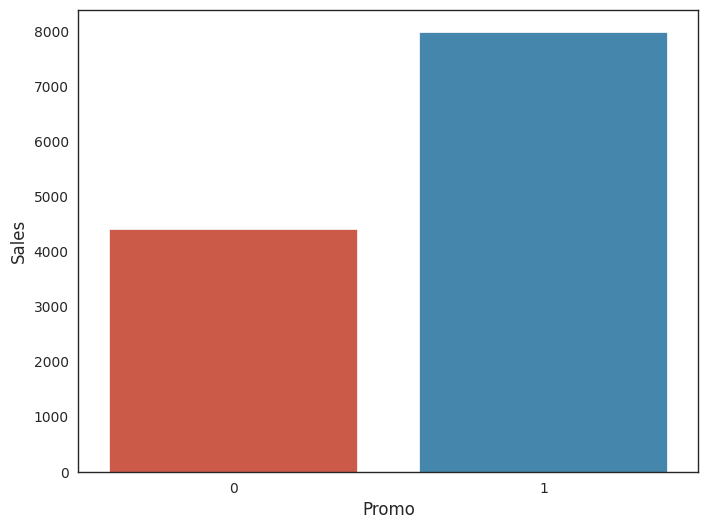

In [ ]:
#Sales Are nearly doubled High When Promo is Running
Promo_sales = pd.DataFrame(rossman_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

In [ ]:
# Value Counts of SchoolHoliday Column
rossman_df.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

### As seen in the piechart, the percentage of sales influenced by school holidays is 18%, whereas the majority of sales are unaffected by school holidays.

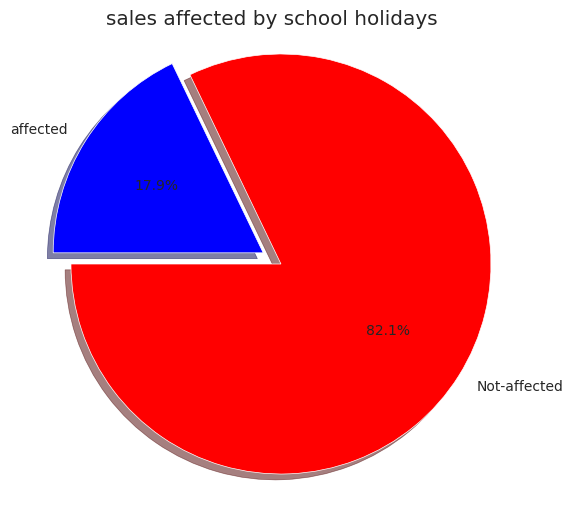

In [ ]:
labels = 'Not-affected' , 'affected'
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['red', 'blue']
explode = (0.1,0.0)
plt.pie(sizes, explode= explode, colors=colors, labels = labels,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title('sales affected by school holidays')
plt.plot()
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [ ]:
rossman_df["StateHoliday"] = rossman_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [ ]:
rossman_df.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

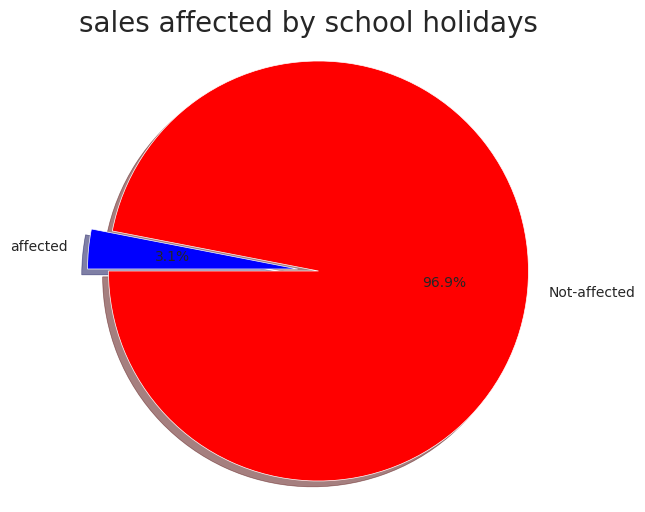

In [ ]:
labels = 'Not-affected' , 'affected'
sizes = rossman_df.StateHoliday.value_counts()
colors = ['red', 'blue']
explode = (0.1,0.0)
plt.pie(sizes, explode= explode, colors=colors, labels = labels,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title('sales affected by school holidays', fontsize = 20)
plt.plot()
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

### As Sales isn't much affected by State Holiday so i'm removing this column


In [ ]:
rossman_df.drop('StateHoliday',inplace=True,axis=1)

<ipython-input-25-0e118c78b529>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rossman_df['Sales'], kde = False,bins=40)


<Axes: xlabel='Sales'>

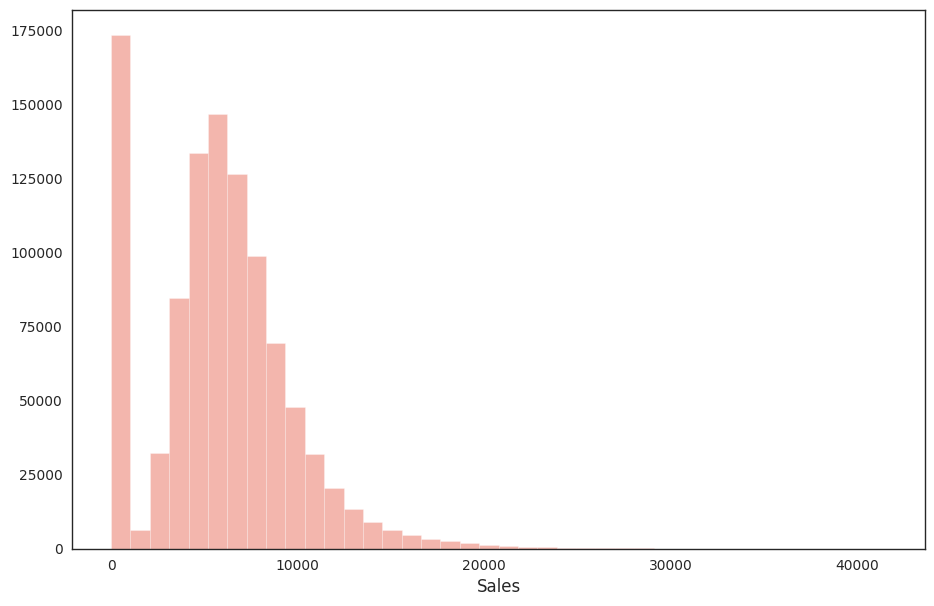

In [ ]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(rossman_df['Sales'], kde = False,bins=40)

### Sales vs Customers

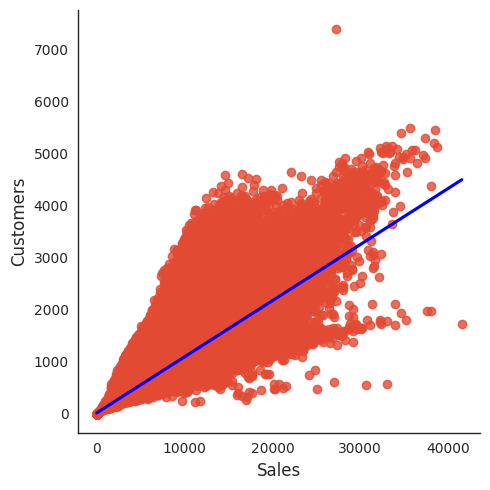

In [ ]:
#linear relation between sales and customers
sns.lmplot(x= 'Sales' , y ='Customers',data=rossman_df, palette='seismic', height=5,aspect=1, line_kws={'color':'blue'})

##**Analysing the Store Dataset** 

In [ ]:
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Checking Information about Dataset

In [ ]:
store_df.shape

(1115, 10)

In [ ]:
#Checking info of data as data types and rows and cols
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#Checking Null Values
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

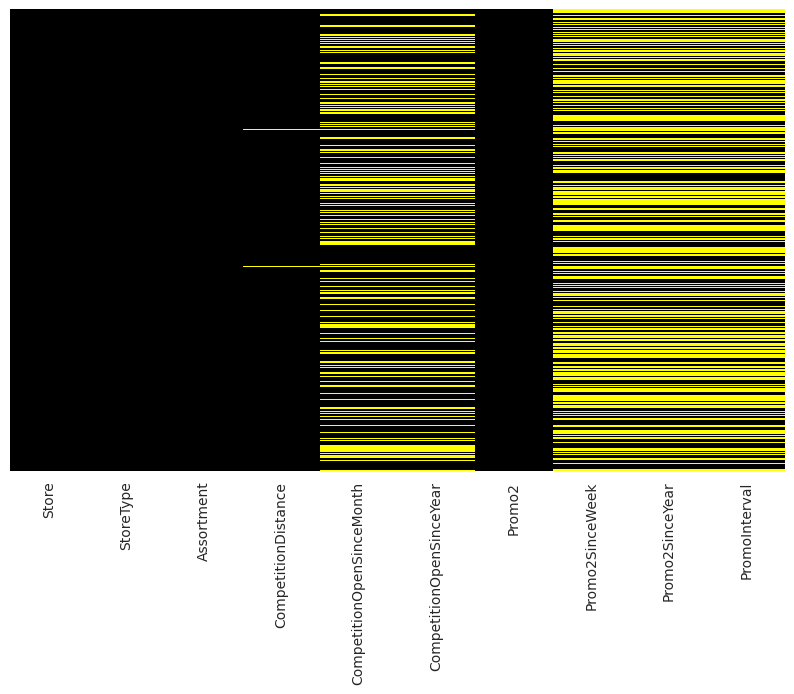

In [ ]:
# creating heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isnull(),yticklabels= False, cbar= False, cmap= 'gnuplot')

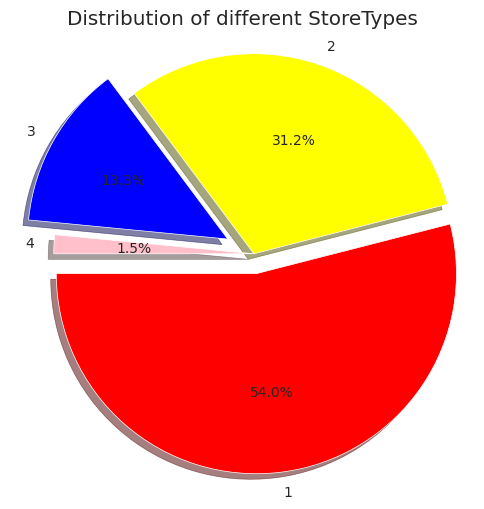

In [ ]:
#Distribution Of Different Store Types
labels = '1' , '2' , '3' , '4'
sizes = store_df.StoreType.value_counts()
colors = ['red', 'yellow' , 'blue' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [ ]:
#We will exclude features with more than 30% missing values since we can determine that they won't be reliable indicators because they have a significant percentage of missing data.
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

<ipython-input-34-5e5bab32b84a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_df.CompetitionDistance.dropna())


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

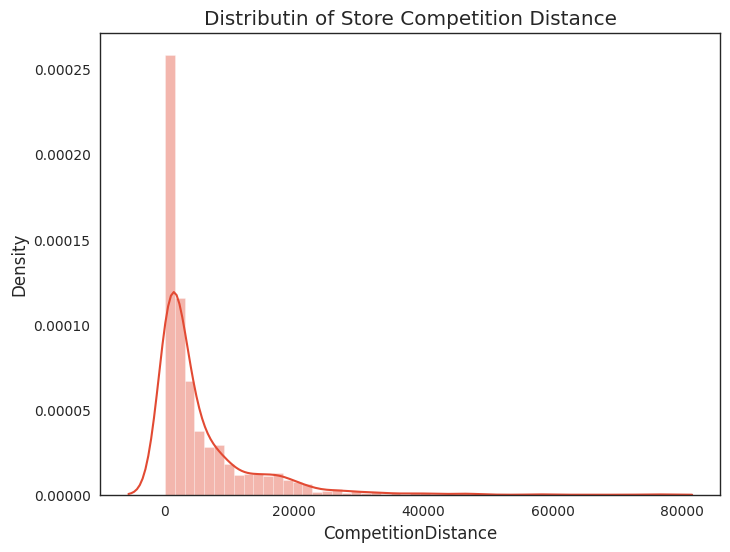

In [ ]:
#Low percentages of missing values should be used to replace missing values in features.
#CompetitionDistance measures the distance in metres between a store and its nearest rival. Let's first examine its distribution.
sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

In [ ]:
#The median will be used to fill in the missing values as the distribution is right-skewed.
# replace missing values in CompetitionDistance with median for the store dataset

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

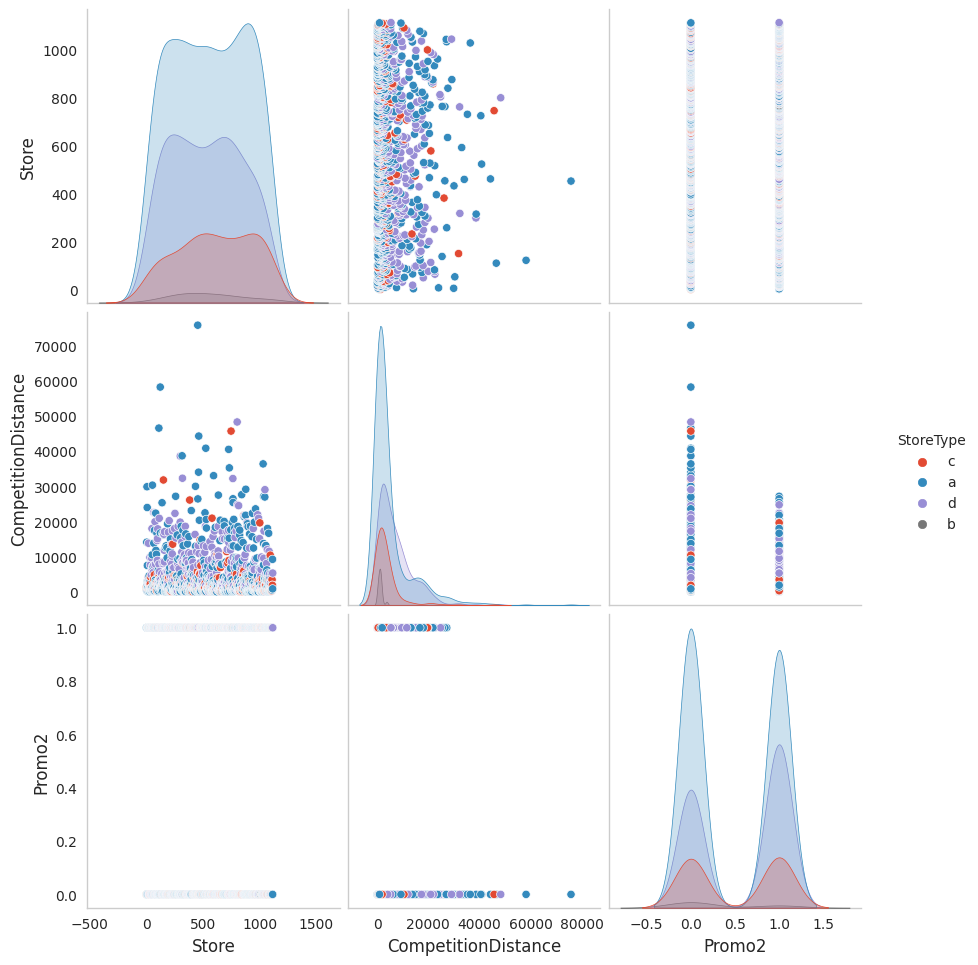

In [ ]:
#Pairplot for Store Dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(10,10);

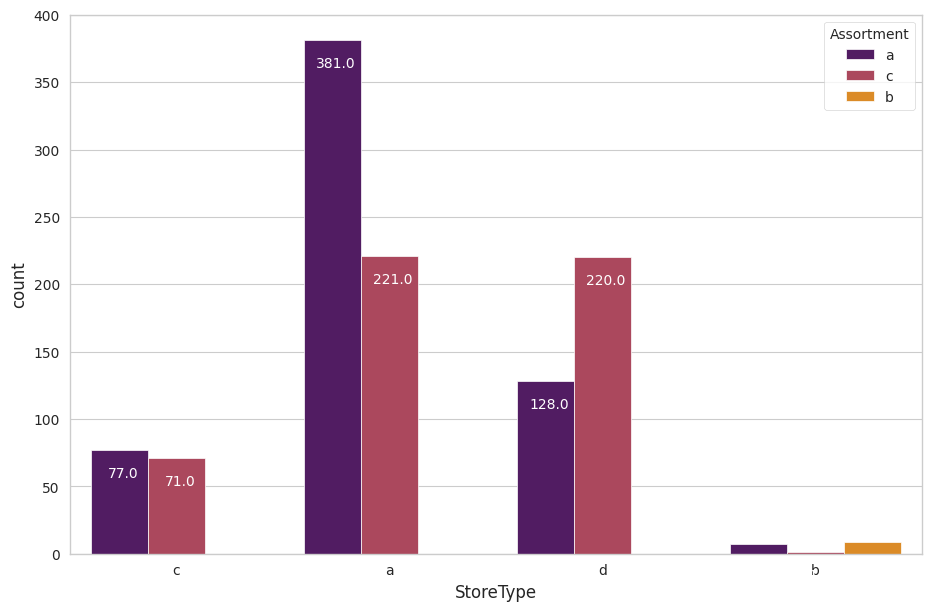

In [ ]:
#checking stores with their assortment type 
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

## *We can see that there is not such significant differences in these 3 years in terms of sales.*


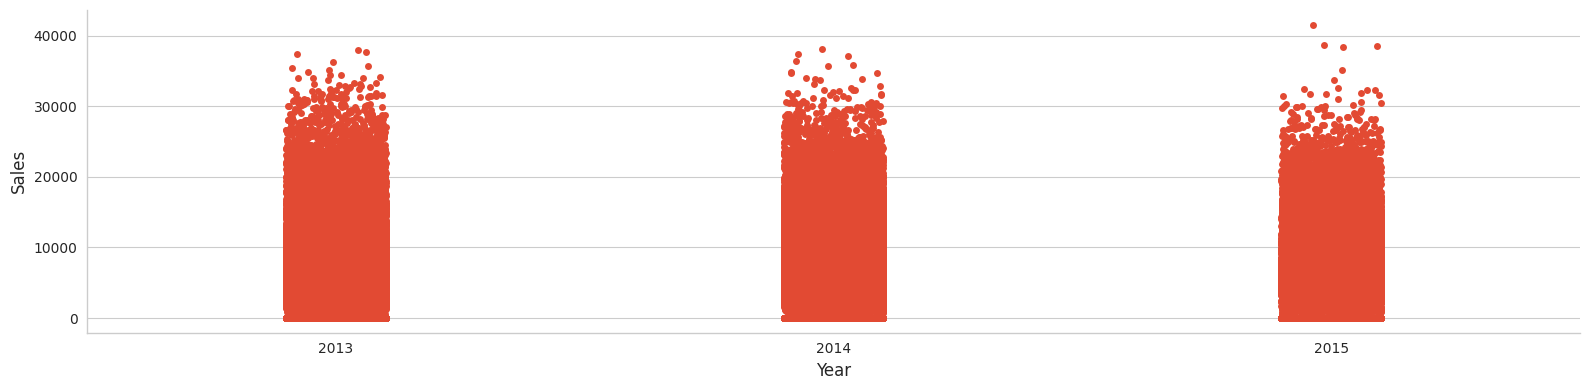

In [ ]:
#plotting year vs sales
sns.catplot(x='Year',y='Sales',data=rossman_df, height=4, aspect=4 )

## **Merging Two Datasets**

In [ ]:
df = pd.merge(rossman_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,31,a,a,29910.0,0


In [ ]:
df.shape

(1017209, 16)

## **Heatmap on merged data set**

<ipython-input-41-c9365ccba2f6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(), annot=True)


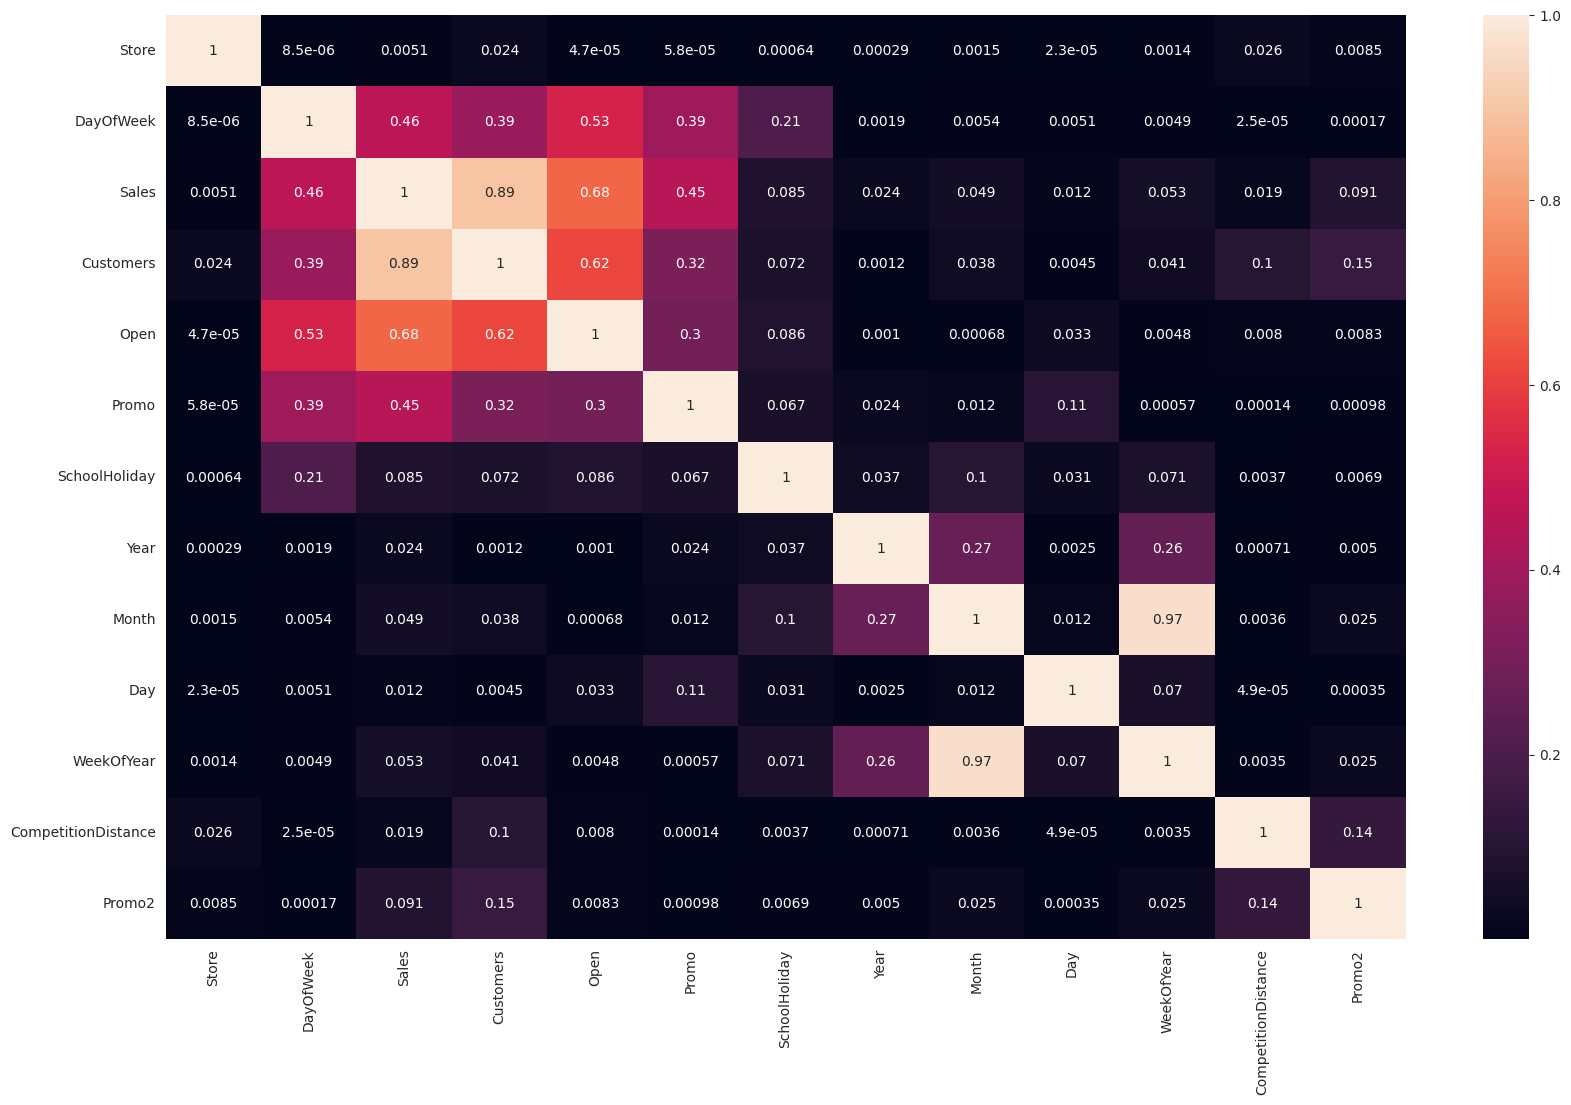

In [ ]:
plt.subplots(figsize=(20,12))
sns.heatmap(df.corr().abs(), annot=True)
plt.savefig("heatmap.png")


In [ ]:
df["Avg_Customer_Sales"] = df.Sales/df.Customers

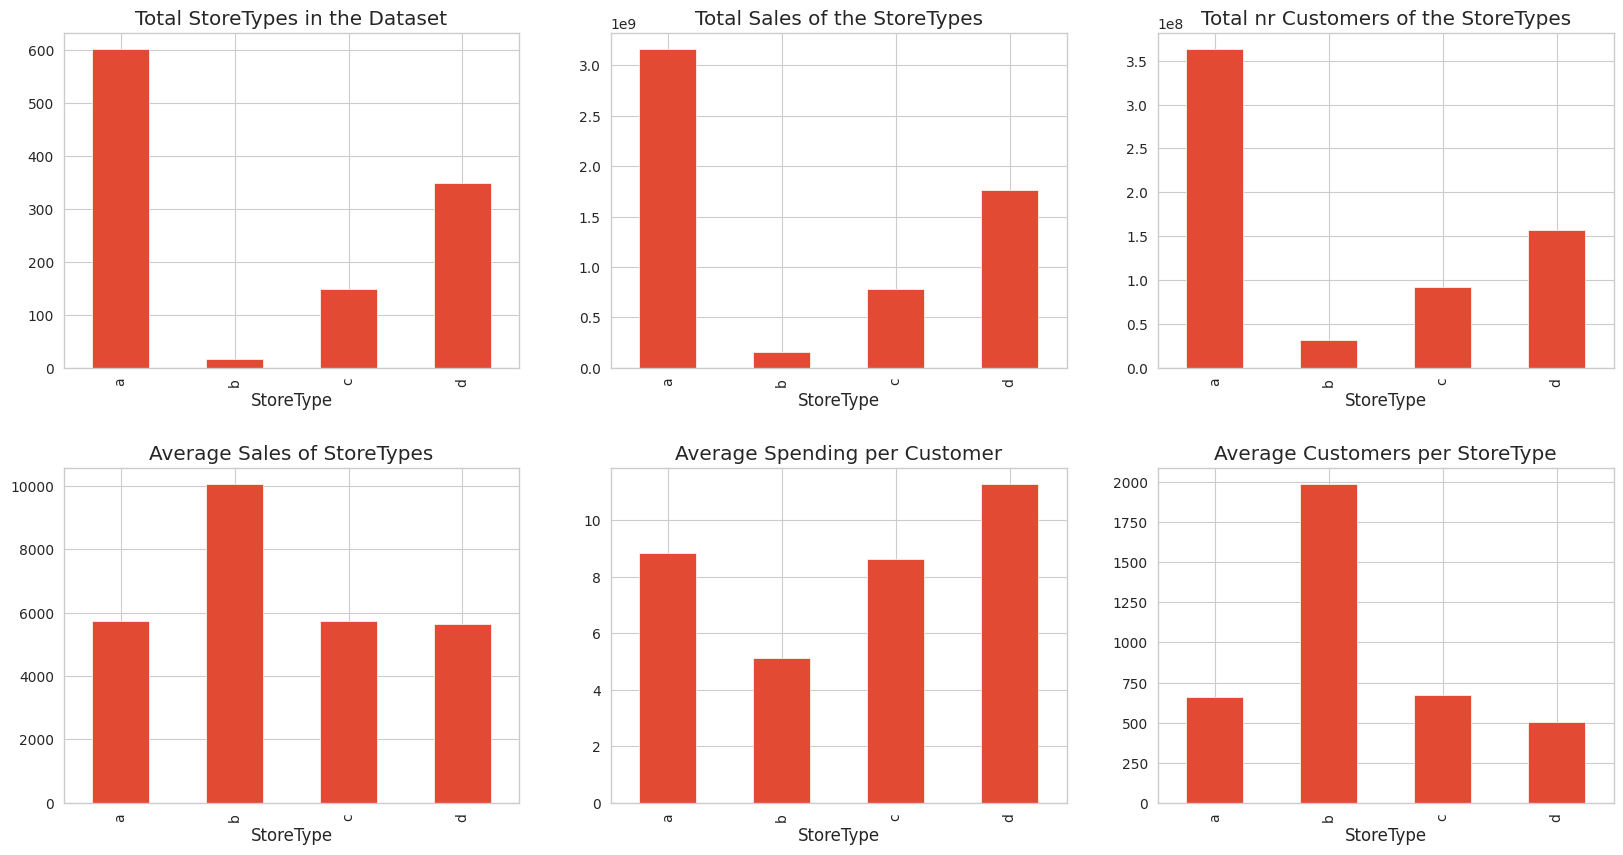

In [ ]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

### The StoreType A has the most stores, sales, and customers, as shown by the graphs. The StoreType D, however, has the highest average consumer expenditure. The most typical clients are served by StoreType B, which has just 17 establishments.

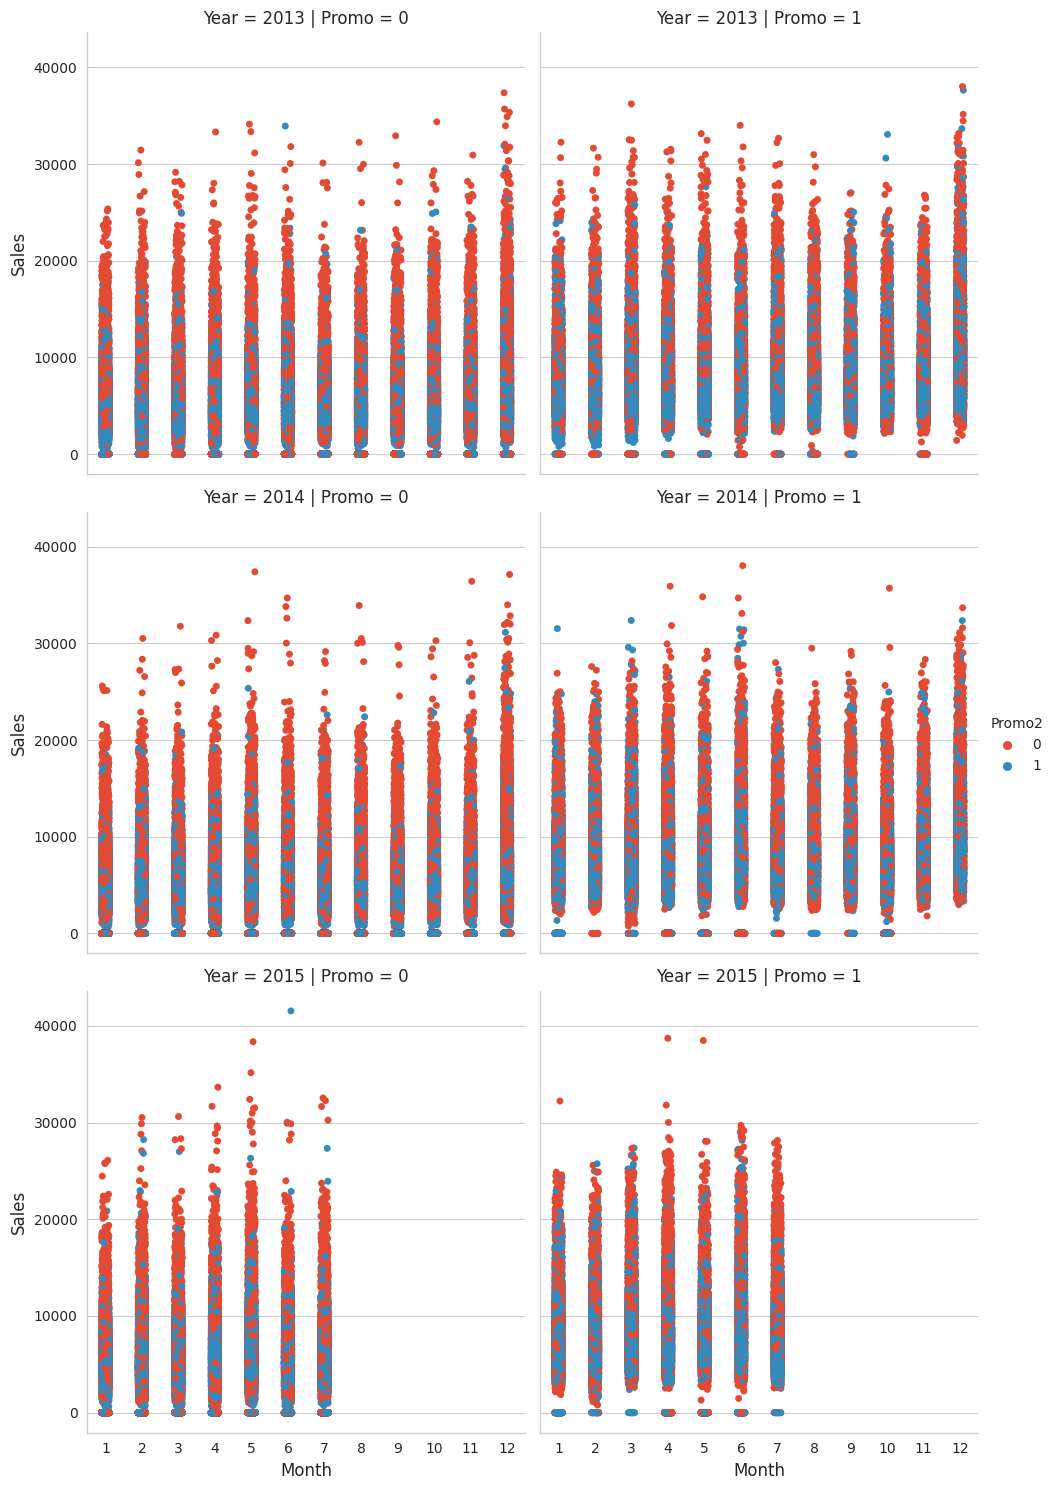

In [ ]:
#promotion
sns.catplot(data = df, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             )
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no year

In [ ]:
#As We can see that when the promo is running Sales are high
sns.catplot(x ='DayOfWeek', y ='Sales',
               hue = 'Promo', data = df)

In [ ]:
print('''So, no promotion over the weekend. However, if the retailers are running promotions, the sales are quite high. 
On Sunday, the Sales are really hopping. No surprise.''')
print("There are", df[(df.Open == 1) & (df.DayOfWeek == 7)].Store.unique().shape[0], "stores opend on sundays")    

## Let's see the trends on a yearly basis.

In [ ]:
## Seasonalities are visible, but patterns are not. Every year, the sales remain consistent. 
sns.catplot(data = df, x = "Month", y = "Sales", col = "Year", hue = "StoreType")

## What about the distance of the competition. What impact does this have on sales, if any.



In [ ]:
df.CompetitionDistance.describe()
# Because the observations are continuous numbers, we must categorize them. Create a new variable now.
df["CompetitionDistance_Cat"] = pd.cut(df["CompetitionDistance"], 5)

<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

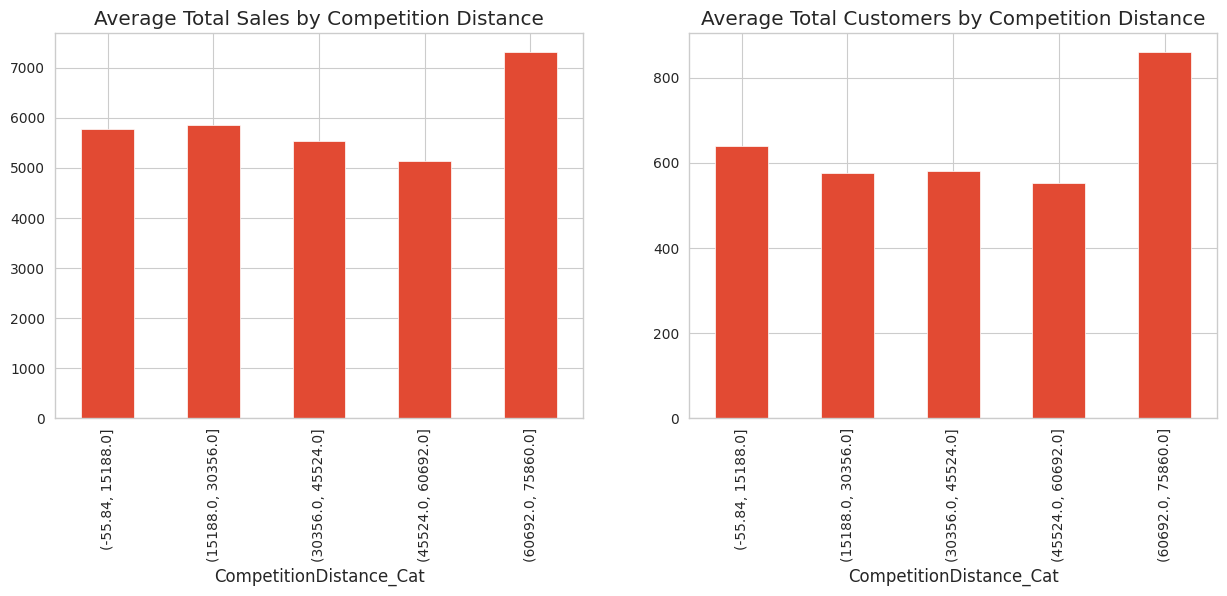

In [ ]:
f, ax = plt.subplots(1,2, figsize = (15,5))

df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])

## It is rather obvious. The performance of the stores (in terms of sales and customers) is better when the competition is far away.

In [ ]:
df.drop(['Avg_Customer_Sales','CompetitionDistance_Cat'],axis=1,inplace=True)

<Axes: >

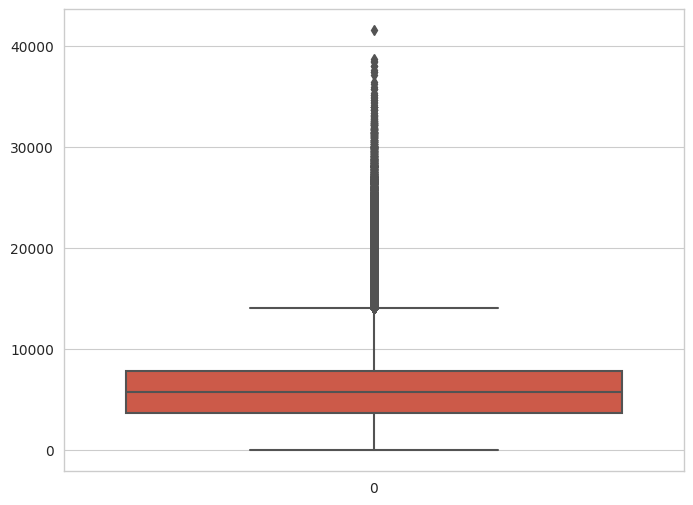

In [ ]:
#checking outliers in sales
sns.boxplot(rossman_df['Sales'])

## Box plot shows that we have a very high outliers in sales


In [ ]:
#Removing Outliers Of Sales Column
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
# defining new variable after removing outliers
df= remove_outlier(df, 'Sales')

# **Conclusion of the analysis:**
Sales and Customer count have a strong connection.  
The most selling and most popular retail type is A.  
The lowest Average Sales per Customer is seen in StoreType B. I thus believe that buyers only come here for minor items.  
The largest buyer cart belonged to Store D.  
Promo runs only in weekdays.  
For all stores, Promotion leads to increase in Sales and Customers both.  
During school breaks, more businesses are open than during state holidays.  
Stores operating during school breaks had more sales than on regular days.  
Sales spike around Christmas week, which may be explained by the fact that more individuals purchase cosmetics when celebrating the holiday. 
Promo2 doesnt seems to be correlated to any significant change in the sales amount.  
Values are missing from features Since Competition Distance values are present when the other two variables are null, Competition Open Since Year/Month does not indicate the lack of a competition.  


## **Drop Subsets Of Data Where Might Cause Bias**

In [ ]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]

In [ ]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [ ]:
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [ ]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [ ]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

In [ ]:
df_new=df.copy()

In [ ]:
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])

In [ ]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,2015,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,1,2015,7,31,31,570.0,1,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,1,2015,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,1,2015,7,31,31,620.0,0,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,1,2015,7,31,31,29910.0,0,1,0,0,0,1,0,0


**From plot it can be sen that most of the sales have been on 1st and last day of week**

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

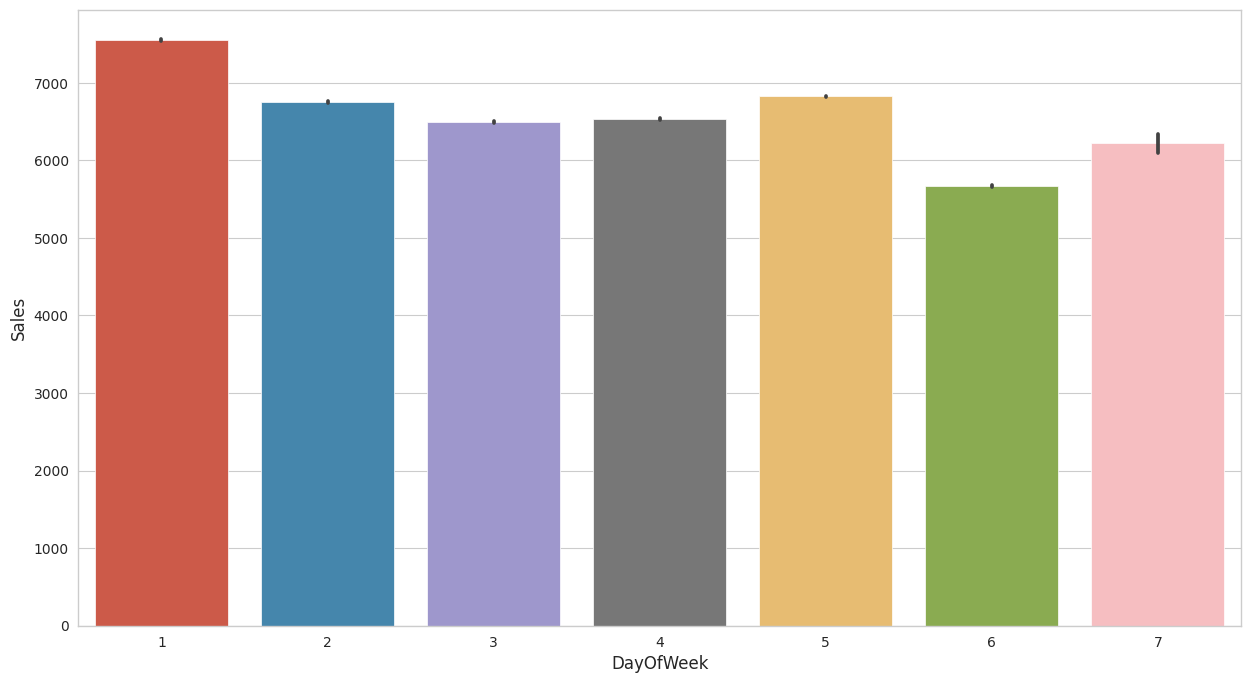

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=df_new)

**Setting Features and Target Variables**

In [ ]:
X = df_new.drop(['Sales','Store','Date','Year'] , axis = 1)
y= df_new.Sales

In [ ]:
X.shape

(817644, 16)

In [ ]:
X.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,1,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,5,625,1,1,7,31,31,570.0,1,1,0,0,0,1,0,0
2,5,821,1,1,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,5,1498,1,1,7,31,31,620.0,0,0,0,1,0,0,0,1
4,5,559,1,1,7,31,31,29910.0,0,1,0,0,0,1,0,0


In [ ]:
y.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

**Splitting Dataset Into Training Set and Test Set**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
columns=X_train.columns

## **Implementing Supervised Machine Learning algorithms.**

## 1. Linear Regression (OLS) ##

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

-1507.441798569973

In [ ]:
regressor.coef_

array([-1.30381346e+02,  3.06863041e+04,  1.09386001e+03,  2.29418388e+01,
        3.54223020e+02,  3.82831239e+01, -1.58021936e+02,  1.82430640e+03,
        3.10732033e+02,  3.18132398e+02, -1.90167603e+03,  1.67419398e+02,
        1.41612423e+03,  1.44688318e+03, -3.17950648e+03,  1.73262330e+03])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

1329406.2402058854

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

1152.998803210951

In [ ]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.7807496727472854

In [ ]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.7823919595957616

In [ ]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

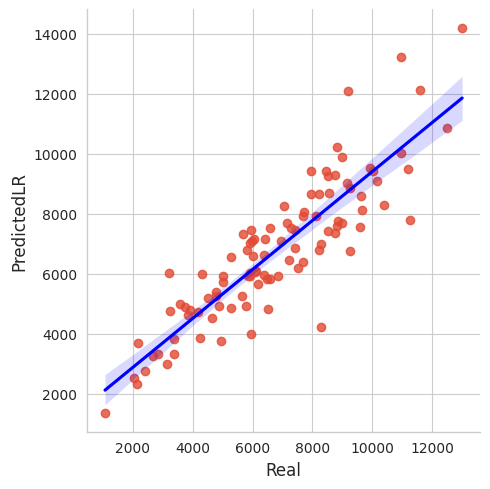

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'blue'})

## **Inferences On Linear Regression Coefficients**

In [ ]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 2.086e+05
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        10:39:23   Log-Likelihood:            -6.9257e+06
No. Observations:              817644   AIC:                         1.385e+07
Df Residuals:                  817629   BIC:                         1.385e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -993.1075      5.669   -175.169      0.000   -1004.219    -981.996
DayOfWeek             -21.0704      0.785    -26.837      0.000     -22.609     -19.532
Customers               7.2260      0.005   1471.966      0.000       7.216       7.236
Promo                1093.4894      2.768    395.028      0.000    1088.064    1098.915
SchoolHoliday          27.2192      3.326      8.183      0.000      20.700      33.738
Month                  33.1415      1.433     23.134      0.000      30.334      35.949
Day                     1.2777      0.152      8.418      0.000       0.980       1.575
WeekOfYear             -3.3867      0.330    -10.267      0.000      -4.033      -2.740
CompetitionDistance     0.0240      0.000    140.522      0.000       0.024       0.024
Promo2                307.7765      2.662    115.635      0.000     302.560     312.993
StoreType_a            66.5792      4.780     13.929      0.000      57.211      75.948
StoreType_b         -2140.7862     12.728   -168.195      0.000   -2165.733   -2115.840
StoreType_c           -81.9285      5.313    -15.419      0.000     -92.342     -71.514
StoreType_d          1163.0279      5.024    231.517      0.000    1153.182    1172.874
Assortment_a         1114.6637      6.456    172.654      0.000    1102.010    1127.317
Assortment_b        -3510.5496     15.385   -228.183      0.000   -3540.703   -3480.396
Assortment_c         1402.7783      6.642    211.194      0.000    1389.760    1415.797
==============================================================================
Omnibus:                    49108.747   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145480.294
Skew:                           0.301   Prob(JB):                         0.00
Kurtosis:                       4.977   Cond. No.                     8.34e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# **2. LARS Lasso Regression**

In [ ]:
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py:109: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [ ]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100

train_score_2=lasreg.score(X_train, y_train)
test_score_2=lasreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Out of Sample Test Score" ,":" , test_score_2)

y_predicted = lasreg.predict(X_train)
y_test_predicted = lasreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.7807308911324253 , Out of Sample Test Score : 0.7823685232825739
Training RMSE : 1155.0769465274698 Testing RMSE : 1153.0608903320883
Training MAPE : 14.215633319957128 Testing MAPE : 14.233294529232587


# **3. Decision Tree Regression**

In [ ]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

In [ ]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9999957301266714 , Test Score : 0.9155414669923622
Training RMSE : 5.097176662035323 Testing RMSE : 718.3120538967034
Training MAPE : 0.0010365300881590655 Testing MAPE : 7.645883743630251


# **Decision Tree With Hyper Parameter Tuning**

In [ ]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
treereg = tree.fit(X_train, y_train)

In [ ]:
train_score_4=treereg.score(X_train, y_train)
test_score_4=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_4 , "," ,
      "Test Score" ,":" , test_score_4)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9635058030756848 , Test Score : 0.9354158425047687
Training RMSE : 471.23126375479194 Testing RMSE : 628.1370155493229
Training MAPE : 5.02537020639386 Testing MAPE : 6.691086367670647


In [ ]:
#storing 100 observations for analysis
dc_pred = y_test_predicted[:100]
dc_real = y_test[:100]
dataset_dc = pd.DataFrame({'Real':dc_real,'PredictedDC':dc_pred}) #storing these values into dataframe

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_dc['diff']=(dataset_dc['Real']-dataset_dc['PredictedDC']).abs()

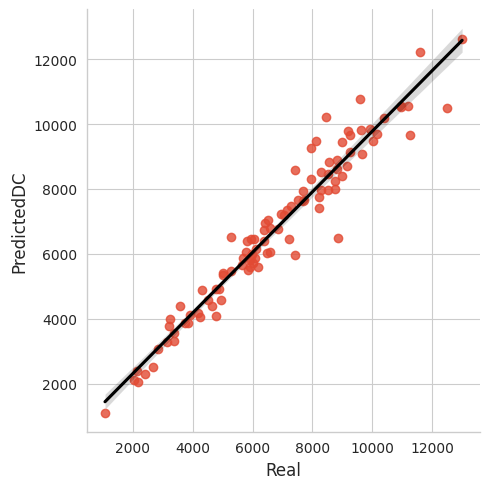

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedDC', data=dataset_dc, line_kws={'color': 'black'})

## **Random Forest With Hyper Parameter Tuning**

In [ ]:
#%%time
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)

In [ ]:


train_score_5=rdfreg.score(X_train, y_train)
test_score_5=rdfreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_5 , "," ,
      "Test Score" ,":" , test_score_5)   

y_predicted_2 = rdfreg.predict(X_train)
y_test_predicted_2 = rdfreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted_2),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted_2))
print("Training MAPE", ":", mape(y_train, y_predicted_2),
      "Testing MAPE", ":", mape(y_test, y_test_predicted_2))



Regresion Model Score : 0.9937869869053034 , Test Score : 0.9563358823620174
Training RMSE : 194.43449873853973 Testing RMSE : 516.4802651447557
Training MAPE : 2.1122605942944936 Testing MAPE : 5.663040909375664


In [ ]:
y_test_predicted_2

array([8414.8125, 6014.725 , 8333.95  , ..., 6444.725 , 6179.3125,
       4569.8625])

In [ ]:
#storing 100 observations for analysis
rf_prd = y_test_predicted_2[:100]
rf_real = y_test[:100]
dataset_rf = pd.DataFrame({'Real':rf_real,'PredictedRF':rf_prd})

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_rf['diff']=(dataset_rf['Real']-dataset_rf['PredictedRF']).abs()

In [ ]:
 # taking 4 sample
dataset_rf.sample(4)

,Real,PredictedRF,diff
443352,11272,9195.0750,2076.9250
97497,9158,9124.7375,33.2625
576551,6116,5980.1375,135.8625
725434,7957,8118.0875,161.0875


In [ ]:
#Statistical description of our predictions and actual values 
dataset_rf.describe()

,Real,PredictedRF,diff
count,100.000000,100.000000,100.000000
mean,6775.070000,6735.320250,383.129250
std,2534.335345,2446.849101,382.692284
min,1072.000000,1107.637500,3.250000
25%,5004.750000,5198.365625,148.087500
50%,6548.000000,6456.831250,282.906250
75%,8598.250000,8486.409375,474.778125
max,13001.000000,12660.375000,2076.925000


<ipython-input-99-070c1d4227fe>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

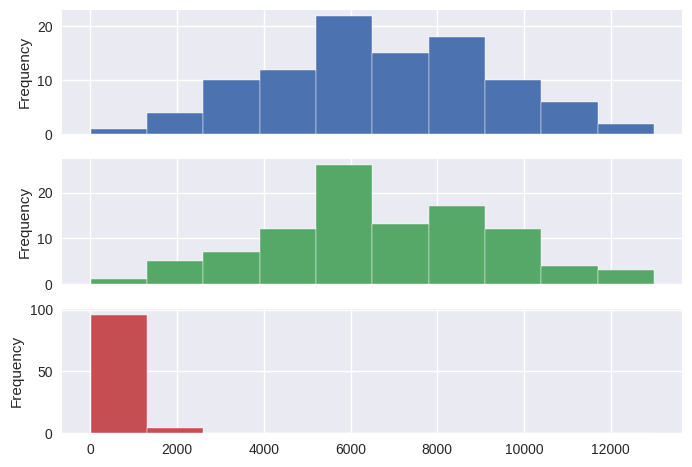

In [ ]:
#plotting the actual,predicted & difference of SALES
plt.style.use('seaborn')
dataset_rf.plot.hist(subplots=True, legend=False)

## As we can see that Actual, Prediction values are approximately closed to each other and there is no such significant variation in our plots.


<Figure size 1000x400 with 0 Axes>

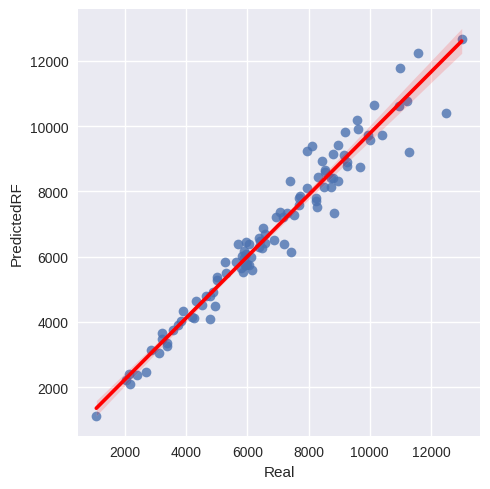

In [ ]:
#visualising our predictions
plt.figure(figsize=(10,4))
sns.lmplot(x='Real', y='PredictedRF', data=dataset_rf, line_kws={'color': 'red'},  aspect=1);

In [ ]:


def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')



# **Feature Importance On Random Forest Regressor**
### As we can see that Random Forest has the highest test score

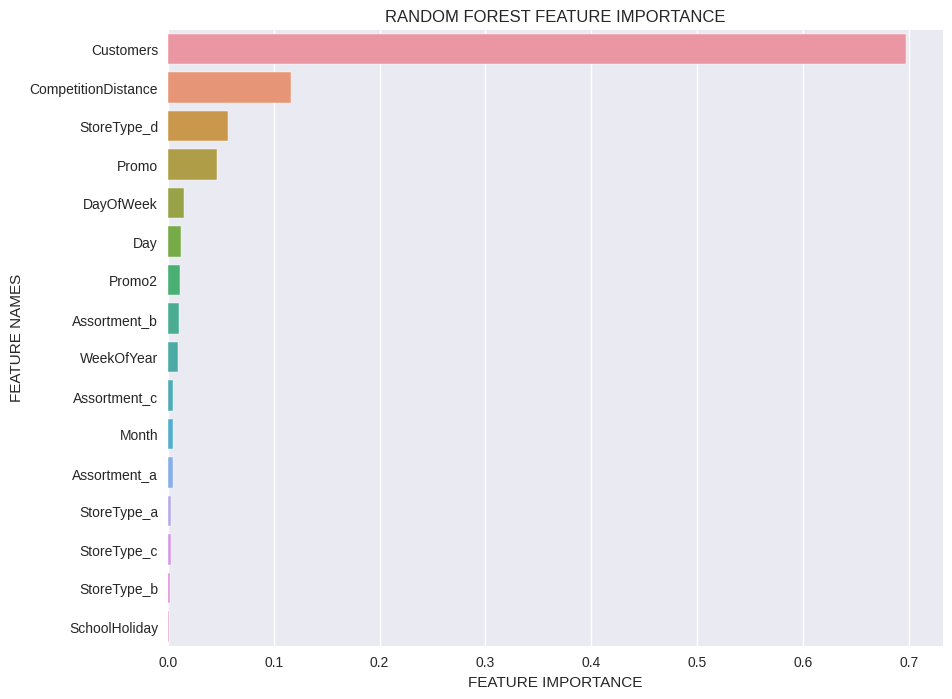

In [ ]:
plot_feature_importance(rdfreg.feature_importances_,columns[:],'RANDOM FOREST')

### customers, CompetitionDistance, StoreType_d, Promo these four are most important features in our sales prediction.

In [ ]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,train_score_2,train_score_3,train_score_4,train_score_5],'Test_Score':[test_score_1,test_score_2,test_score_3,test_score_4,test_score_5]},index=['Linear Regression','Lasso Regression','Decision Tree',"Decision Tree(hyperparameters)",'Random Forest Regression'])


# **Conclusion**

In [ ]:
score_df

,Train_Score,Test_Score
Linear Regression,0.780750,0.782392
Lasso Regression,0.780731,0.782369
Decision Tree,0.999996,0.915541
Decision Tree(hyperparameters),0.963506,0.935416
Random Forest Regression,0.993787,0.956336


### The Random Forest regressor's lowest MAPE result of 5.65% indicates that it is an extremely accurate model. The MAE stands for the average magnitude of error created by the model, while the MAPE stands for the average deviation between the model's predictions and its corresponding outputs.